# Import Packages and Data

In [30]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [2]:
Youtube_data = pd.read_csv('C:/Users/chris/Desktop/data/DS105/Lesson4/YouTubeChannels_Python.csv')

# Wrangling and Exploration

In [4]:
Youtube_data.head()

,Rank,Gr2de,Channel name,Video Uploads,Subscribers,Video views
0,1st,0,Zee TV,82757,18752951,20869786591
1,2nd,0,T-Series,12661,61196302,47548839843
2,3rd,0,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,0,SET India,27323,31180559,22675948293
4,5th,0,WWE,36756,32852346,26273668433


In [5]:
Youtube_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Gr2de          5000 non-null   int64 
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 234.5+ KB


In [7]:
Youtube_data.Gr2de.value_counts()

Gr2de
3    2956
2    1993
1      41
0      10
Name: count, dtype: int64

In [9]:
Youtube_data['Video views'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Video views
Non-Null Count  Dtype
--------------  -----
5000 non-null   int64
dtypes: int64(1)
memory usage: 39.2 KB


In [10]:
# Create Working dataset
# Recode Gr2de to grade and Video views to views
yt = Youtube_data


In [11]:
yt['views'] = yt['Video views']

In [12]:
yt['grade'] = yt['Gr2de']

In [13]:
yt1 = yt[['grade', 'views']]

In [15]:
yt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   grade   5000 non-null   int64
 1   views   5000 non-null   int64
dtypes: int64(2)
memory usage: 78.3 KB


# Test Assumptions

C:\Users\chris\AppData\Local\Temp\ipykernel_16744\2760793986.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yt1.views)


<AxesSubplot: xlabel='views', ylabel='Density'>

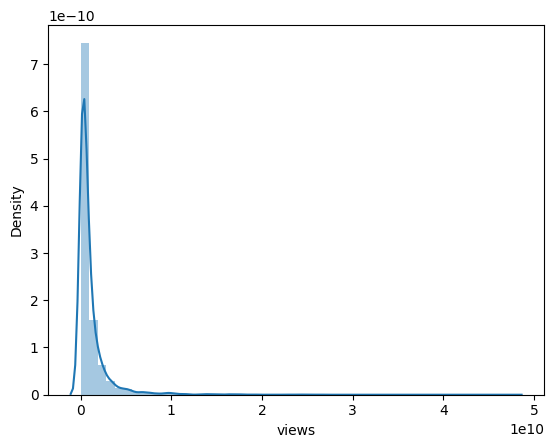

In [17]:
# n > 20 Sample size assumption met

# Assess Normality
sns.distplot(yt1.views)

In [18]:
# Very positive Skew

# Square Root Transformation
yt1['viewsSQRT'] = np.sqrt(yt1.views)

C:\Users\chris\AppData\Local\Temp\ipykernel_16744\2534658378.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt1['viewsSQRT'] = np.sqrt(yt1.views)


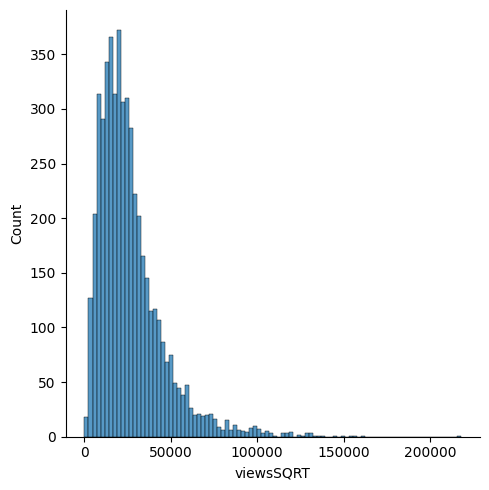

In [19]:
sns.displot(yt1.viewsSQRT)

In [20]:
# Still not very normal but better

# Logarithmic transformation
yt1['viewsLOG'] = np.log(yt1.views)

C:\Users\chris\AppData\Local\Temp\ipykernel_16744\825739254.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt1['viewsLOG'] = np.log(yt1.views)


C:\Users\chris\AppData\Local\Temp\ipykernel_16744\3297536244.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yt1.viewsLOG)


<AxesSubplot: xlabel='viewsLOG', ylabel='Density'>

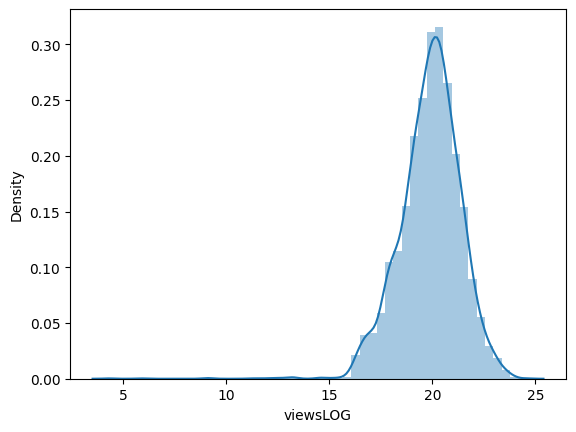

In [22]:
sns.distplot(yt1.viewsLOG)

### Log appears to be the closest to normal distribution

## Homogeneity of Variance

In [23]:
# Bartletts Test
scipy.stats.bartlett(yt1.viewsLOG, yt1.grade)

BartlettResult(statistic=4642.606911455518, pvalue=0.0)

In [25]:
# Fligner's Test
scipy.stats.fligner(yt1.viewsLOG, yt1.grade)

FlignerResult(statistic=2200.0468371244633, pvalue=0.0)

## Both Fail to meet the assumption for Homogeneity of Variance

# Run ANOVA 


In [27]:
stats.f_oneway(yt1['viewsLOG'][yt1['grade'] == 3],
              yt1['viewsLOG'][yt1['grade'] == 2],
              yt1['viewsLOG'][yt1['grade'] == 1],
              yt1['viewsLOG'][yt1['grade'] == 0])

F_onewayResult(statistic=283.85148674568444, pvalue=3.895240835935201e-170)

#### The pvalue is less than .05 and is significant

# Post Hoc

In [32]:
# Create postHoc to assign variables for Tukey function
postHOC = MultiComparison(yt1.viewsLOG, yt1.grade)

In [35]:
postHocResults = postHOC.tukeyhsd()

In [37]:
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -1.5233 0.0085   -2.76 -0.2865   True
     0      2   -3.103    0.0 -4.2146 -1.9913   True
     0      3  -4.1291    0.0 -5.2399 -3.0184   True
     1      2  -1.5797    0.0  -2.133 -1.0264   True
     1      3  -2.6059    0.0 -3.1573 -2.0544   True
     2      3  -1.0262    0.0 -1.1278 -0.9245   True
----------------------------------------------------


### The reject column indicates that there is a significant difference between all grades

In [51]:
# View the means
yt1.groupby('grade').mean()

,views,viewsSQRT,viewsLOG
grade,,,
0,2.119909e+10,139631.341341,23.578544
1,6.053121e+09,70951.341638,22.055279
2,1.676207e+09,34678.089608,20.475580
3,5.265217e+08,19943.101566,19.449400


### Because the data was recieved recoded, cannot be certain what each grade represents numerically. 

It appears the 0 has the highest mean of views and the mean of views get lower with each grade as the grade number increases. So, 3 has the lowest mean. 